# Project: Customer Analytics, Customer Segmentation and Customer Lifetime Value for Ecommerce

**Objective:** To perform a variety of customer analytics, including customer segmentation, calculating customer lifetime value and predicting next purchase date for an ecommerce business, and to provide value-add recommendations based on the analytics.

**Tools Used:** Python, Pandas, scikit-learn, Matplotlib, Seaborn

**Skills Demonstrated:** Data Cleaning, Feature Extraction, Exploratory Data Analysis, K-Means Clustering (Unsupervised Learning), Linear Regression (Supervised Learning), Customer Segmentation, Data Visualization

# Part A. Read and Clean the Data
**Objective:** Clean the data by addressing null values and correcting data types.

## 1. Read the Data

In [1]:
import pandas as pd

df = pd.read_csv('online_retail.csv', encoding='unicode_escape')

df.shape

(1041845, 8)

## 2. Clean the Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041845 entries, 0 to 1041844
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1041845 non-null  object 
 1   StockCode    1041845 non-null  object 
 2   Description  1037478 non-null  object 
 3   Quantity     1041845 non-null  int64  
 4   InvoiceDate  1041845 non-null  object 
 5   Price        1041845 non-null  float64
 6   CustomerID   806702 non-null   float64
 7   Country      1041845 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 63.6+ MB


**Observations:**

* There are 235,143 rows in the dataset with no CustomerID.  As the customers need to be identifiable for my analysis, I will drop these rows.

In [3]:
# Drop observations without a Customer ID and change to string data type.
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype('float').astype('int').astype('str')

# Change the InvoiceDate feature to date data type.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True, errors='coerce')

# Drop observations with stock codes that are not products.
df = df[~df['StockCode'].str[0].str.isalpha()]

In [4]:
df.info()

display(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803037 entries, 0 to 1041844
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      803037 non-null  object        
 1   StockCode    803037 non-null  object        
 2   Description  803037 non-null  object        
 3   Quantity     803037 non-null  int64         
 4   InvoiceDate  803037 non-null  datetime64[ns]
 5   Price        803037 non-null  float64       
 6   CustomerID   803037 non-null  object        
 7   Country      803037 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 55.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2019-01-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2019-01-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2019-01-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2019-01-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2019-01-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1041840,C579886,22197,POPCORN HOLDER,-1,2020-12-30 17:39:00,0.85,15676,United Kingdom
1041841,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2020-12-30 17:39:00,3.29,15676,United Kingdom
1041842,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2020-12-30 17:42:00,1.25,16717,United Kingdom
1041843,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2020-12-30 17:42:00,7.95,16717,United Kingdom


In [5]:
# Check for rows with a negative quantity.
len(df[df['Quantity'] < 0 ])

17586

**Observations:**

* There are 17,586 rows in the dataset with a negative quantity.  My assumption is that these are product returns and will therefore retain them.

# Part B. Exploratory Data Analysis and Feature Engineering
**Objective:** Explore the cleaned dataset and engineer features for later analysis.

## 1. Create Time and Date Features

In [6]:
# Add year-month and other date/time features, useful for later analysis and plotting.
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.dayofweek # Starts at Monday with index 0.
df['Hour'] = df['InvoiceDate'].dt.hour

## 2. Calculate and Explore Monthly Revenue

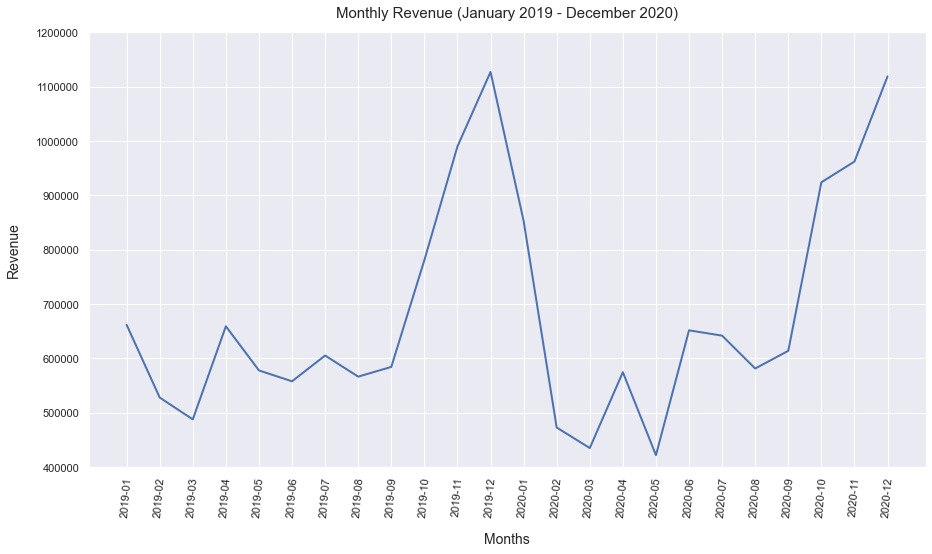

In [7]:
# Add revenue feature to calculate revenue for each row.
df['Revenue'] = df['Price'] * df['Quantity']

# Calculate monthly revenue.
df_revenue = df.groupby(['YearMonth'])['Revenue'].sum().reset_index()

# Plot monthly revenue.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
s = sns.lineplot(data=df_revenue, color='b', linewidth=2, legend=None)
s.set_title('Monthly Revenue (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Months', fontsize=14, labelpad=15)
s.set_ylabel('Revenue', fontsize=14, labelpad=15)
plt.xticks(np.arange(len(df_revenue['YearMonth'])), df_revenue['YearMonth'])
plt.ylim(400000, 1200000)
plt.ticklabel_format(style='plain', axis='y')

for item in s.get_xticklabels():
    item.set_rotation(85)

**Observations:**

* Monthly revenue is fairly consistent in Q1 - Q3 each year, ranging between \\$400k and \\$650k.
* There is a cyclical increase in monthly sales during Q4 of each year, likely explained by the holidays in the quarter, of which Christmas is the primary holiday.  Sales in December are approximately twice the monthly average seen in Q1 to Q3.

In [8]:
# Display top 10 customers by revenue.
df.groupby('CustomerID')['Revenue'].sum().nlargest(10).reset_index()

,CustomerID,Revenue
0,18102,594757.71
1,14646,511474.72
2,14156,298276.26
3,14911,256036.68
4,17450,234270.35
5,13694,188065.02
6,17511,164519.48
7,12415,143107.02
8,16684,136128.31
9,15061,132515.77


**Observations:**

* The top 2 customers over the two year period have a spend signficantly higher than all other customers, including the others in the top 10.
* All top 10 customers have a significant spend and are likely bulk buyers who resell the goods.

## 3. Calculate and Explore Monthly Revenue Growth Rate

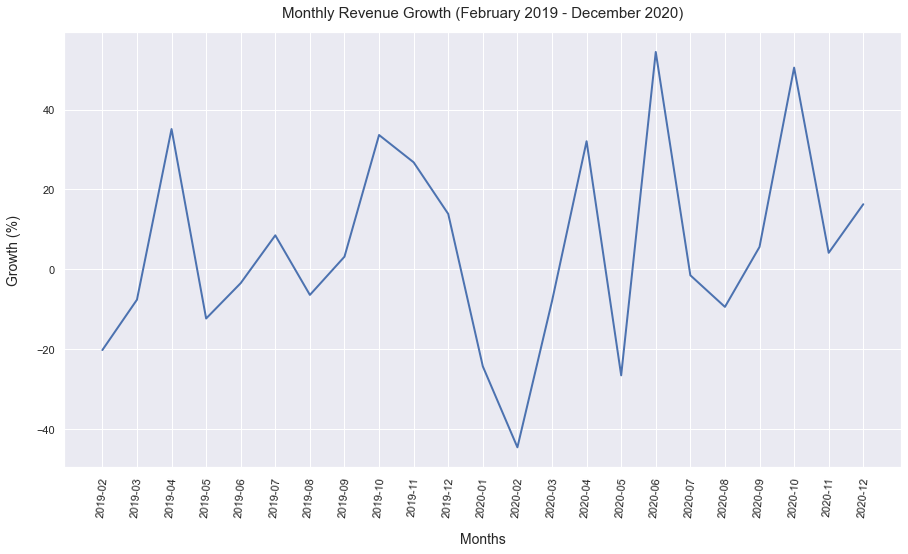

In [9]:
# Calculate monthly growth rate.
df_revenue['Growth'] = df_revenue['Revenue'].pct_change() * 100
df_growth = df_revenue[df_revenue['YearMonth'] >= '2019-01-31'].reset_index()

# Plot the growth rate.
plt.figure(figsize=(15,8))
s = sns.lineplot(data=df_growth['Growth'], color='b', linewidth=2, legend=None)
s.set_title('Monthly Revenue Growth (February 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Months', fontsize=14, labelpad=15)
s.set_ylabel('Growth (%)', fontsize=14, labelpad=15)
plt.xticks(np.arange(len(df_growth['YearMonth'])), df_growth['YearMonth'])
plt.ticklabel_format(style='plain', axis='y')

for item in s.get_xticklabels():
    item.set_rotation(85)

**Observations:**

* Revenue growth is inconsistent month to month, swinging frequently and sometimes wildly between positive and negative growth.  There are almost as many months of negative growth (11) as there are months of positive growth (12).
* First quarter months show negative growth primarily because sales are coming off of the Christmas high in December.

## 4. Calculate and Explore Monthly Active Customers

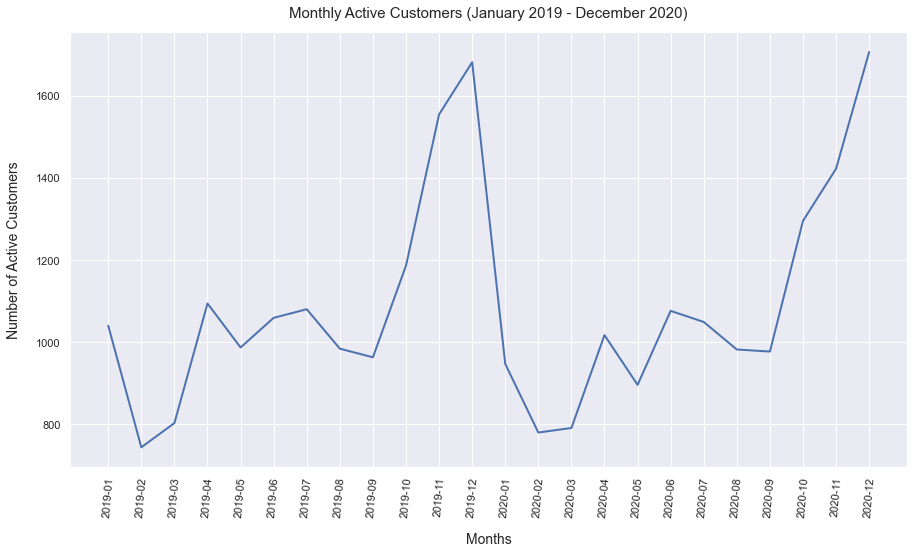

In [10]:
# Calculate number of monthly active customers.
df_active = df.groupby('YearMonth')['CustomerID'].nunique()

# Plot the number of monthly active customers.
plt.figure(figsize=(15,8))
s = sns.lineplot(data=df_active, color='b', linewidth=2, legend=None)
s.set_title('Monthly Active Customers (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Months', fontsize=14, labelpad=15)
s.set_ylabel('Number of Active Customers', fontsize=14, labelpad=15)
plt.ticklabel_format(style='plain', axis='y')

for item in s.get_xticklabels():
    item.set_rotation(85)

**Observations:**

* Consistent with the trend of monthly revenue plotted above, the number of active customers increases in Q4 in the lead up to the holidays and Christmas.
* There is a drop off in active customers in January and February each year.
* The number of active customers in 2020 is similar to the number in 2019, indicating a lack in growth of the customer base year on year.

**Recommendations:**

* The ecommerce business should run promotions in Q1 each year to increase the number of active customers and revenue, to avoid the drop off experienced each year.
* The ecommerce business should focus marketing efforts on attracting new customers and increasing the customer base.

## 5. Calculate and Explore Monthly Number of Orders

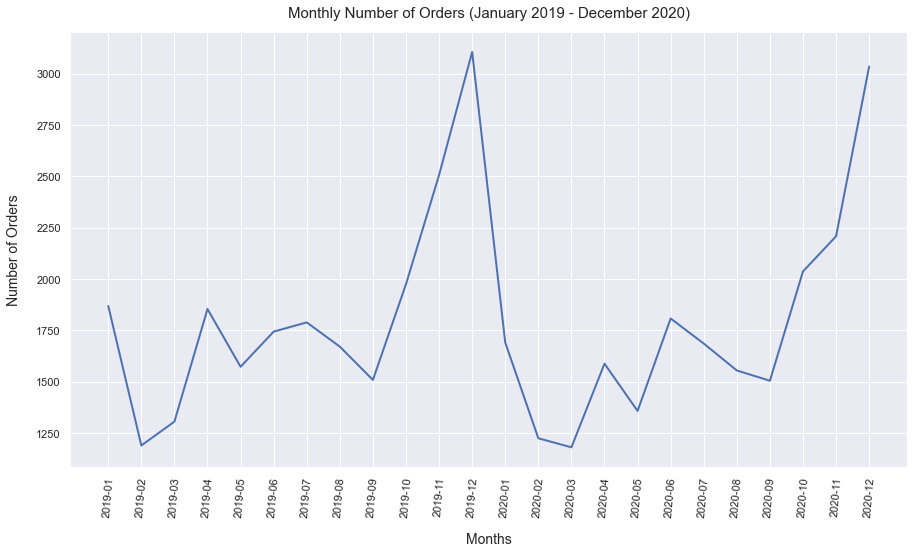

In [11]:
# Calculate number of monthly orders.
df_orders = df.groupby('YearMonth')['Invoice'].nunique().reset_index()

# Plot monthly number of orders.
plt.figure(figsize=(15,8))
s = sns.lineplot(data=df_orders, color='b', linewidth=2, legend=None)
s.set_title('Monthly Number of Orders (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Months', fontsize=14, labelpad=15)
s.set_ylabel('Number of Orders', fontsize=14, labelpad=15)
plt.xticks(np.arange(len(df_orders['YearMonth'])), df_orders['YearMonth'])
plt.ticklabel_format(style='plain', axis='y')

for item in s.get_xticklabels():
    item.set_rotation(85)

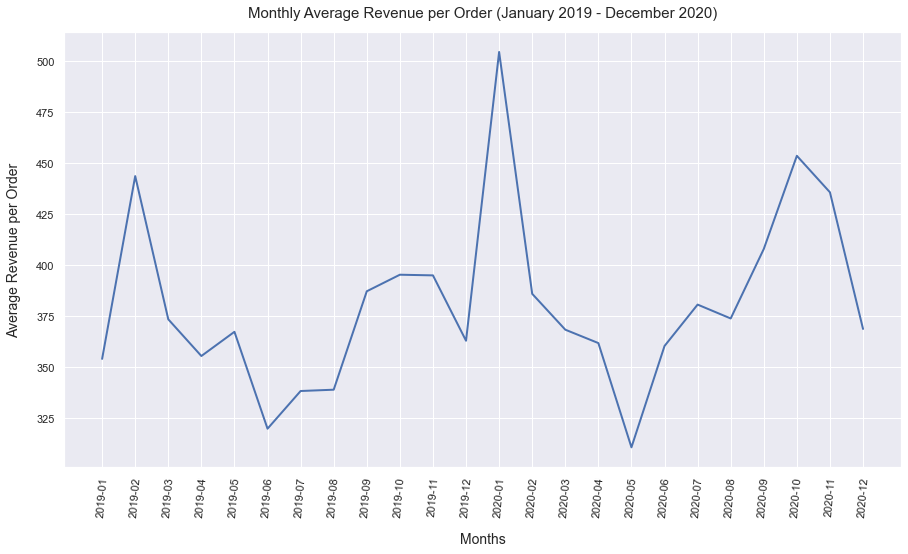

In [12]:
# Calculate monthly average revenue per order.
df_orders_avg = df_revenue.copy()
df_orders_avg['Average'] = df_revenue['Revenue'] / df_orders['Invoice']

# Plot monthly average revenue per order.
plt.figure(figsize=(15,8))
s = sns.lineplot(data=df_orders_avg['Average'], color='b', linewidth=2, legend=None)
s.set_title('Monthly Average Revenue per Order (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Months', fontsize=14, labelpad=15)
s.set_ylabel('Average Revenue per Order', fontsize=14, labelpad=15)
plt.xticks(np.arange(len(df_orders_avg['YearMonth'])), df_orders_avg['YearMonth'])
plt.ticklabel_format(style='plain', axis='y')

for item in s.get_xticklabels():
    item.set_rotation(85)

**Observations:**

* The monthly average revenue per order is inconsistent month to month, but does appear to follow a cyclical pattern.  Average revenue per order peaks in Q1 each year and also experiences an increase in Q4 during the holiday period, but does decrease in December.
* The lowest average revenue per order is experienced in May or June each year.

**Recommendations:**

* A further analysis is required to determine the reasons for the peaks and valleys in monthly average revenue per order.
* The ecommerce business should investigate why average revenue per order decreases in December each year, when it would be expected that there is high customer demand and averages should be increasing.
* The ecommerce business should investigate why average revenue per order decreases in May or June each year.  It may be that a different product mix is required at that time of year.

In [13]:
# Display top 10 customers by number of orders.
df.groupby('CustomerID')['Invoice'].nunique().nlargest(10).reset_index()

,CustomerID,Invoice
0,14911,456
1,12748,334
2,17841,283
3,15311,264
4,14606,248
5,13089,243
6,14156,182
7,17850,159
8,13694,155
9,14646,150


**Observations:**

* All top 10 customers have a significant number of orders and are likely bulk buyers who resell the goods.

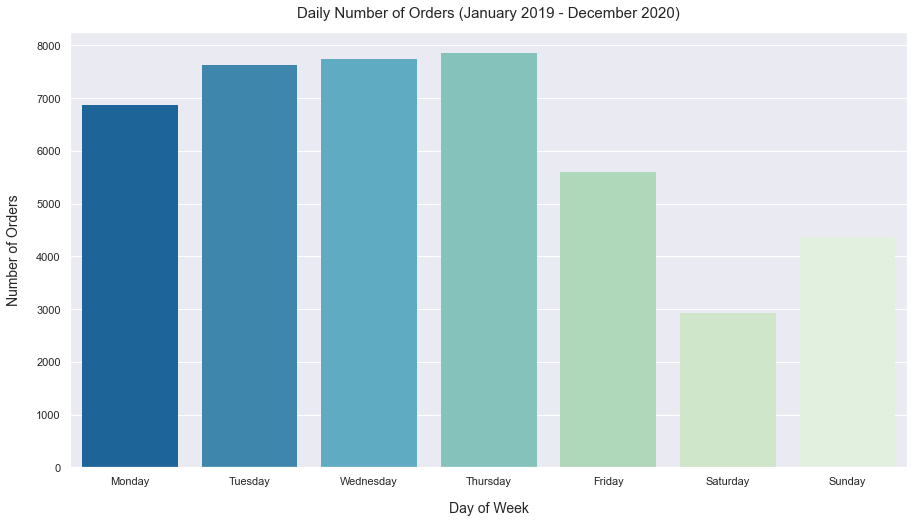

In [14]:
# Plot number of orders by day of week.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df.groupby('Day')['Invoice'].nunique().reset_index(), x='Day', y='Invoice', palette='GnBu_r', linewidth=0)
s.set_title('Daily Number of Orders (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Day of Week', fontsize=14, labelpad=15)
s.set_ylabel('Number of Orders', fontsize=14, labelpad=15)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ticklabel_format(style='plain', axis='y')

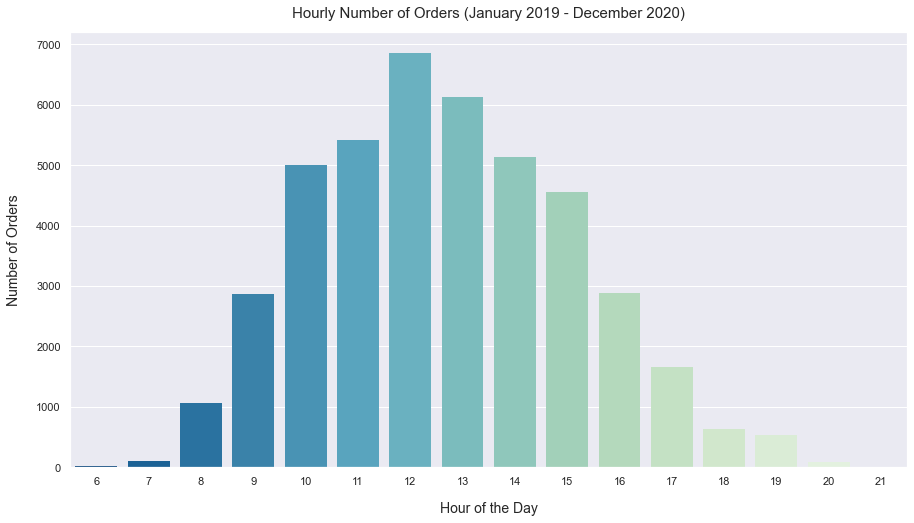

In [15]:
# Plot number of orders by hour of the day.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df.groupby('Hour')['Invoice'].nunique().reset_index(), x='Hour', y='Invoice', palette='GnBu_r', linewidth=0)
s.set_title('Hourly Number of Orders (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Hour of the Day', fontsize=14, labelpad=15)
s.set_ylabel('Number of Orders', fontsize=14, labelpad=15)
plt.xticks(np.arange(16), ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
plt.ticklabel_format(style='plain', axis='y')

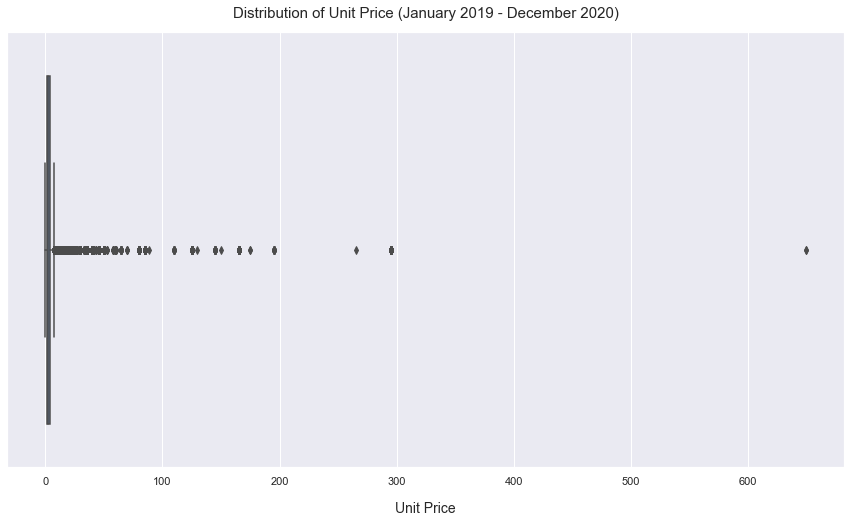

In [16]:
# Plot distribution of unit price of items ordered.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.subplots(figsize=(15,8))
s = sns.boxplot(df['Price'])
s.set_title('Distribution of Unit Price (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Unit Price', fontsize=14, labelpad=15)
plt.show()

**Observations:**

* A significant majority of products stocked by the ecommerce business have low selling prices.

**Recommendations:**

* The ecommerce business should consider stocking more products with higher selling prices, likely increasing margins.

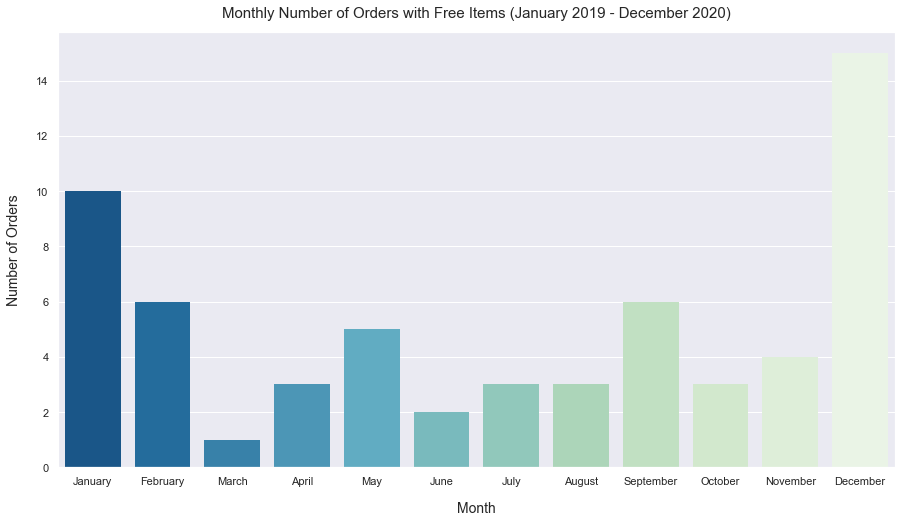

In [17]:
# Plot monthly number of orders with free items.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df[df['Revenue'] == 0].groupby('Month')['Invoice'].count().reset_index(), x='Month', 
                y='Invoice', palette='GnBu_r', linewidth=0)
s.set_title('Monthly Number of Orders with Free Items (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Month', fontsize=14, labelpad=15)
s.set_ylabel('Number of Orders', fontsize=14, labelpad=15)
plt.xticks(np.arange(12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                          'October', 'November', 'December'])
plt.ticklabel_format(style='plain', axis='y')

## 6. Calculate and Explore Number of Orders by Country

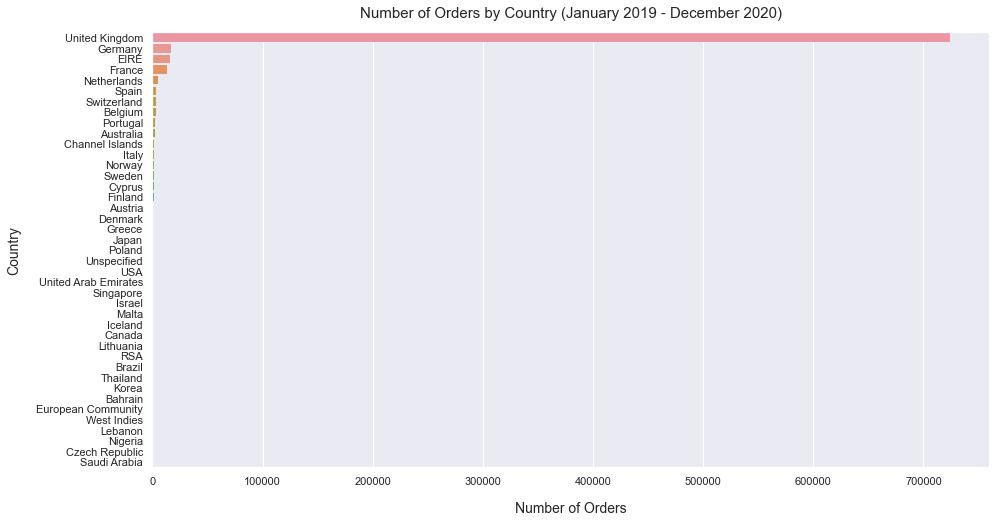

In [18]:
# Plot number of orders by country.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df.groupby('Country')['InvoiceDate'].count().sort_values(ascending=False).reset_index(),
                y='Country', x='InvoiceDate', linewidth=0)
s.set_title('Number of Orders by Country (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Number of Orders', fontsize=14, labelpad=15)
s.set_ylabel('Country', fontsize=14, labelpad=15)
plt.show()

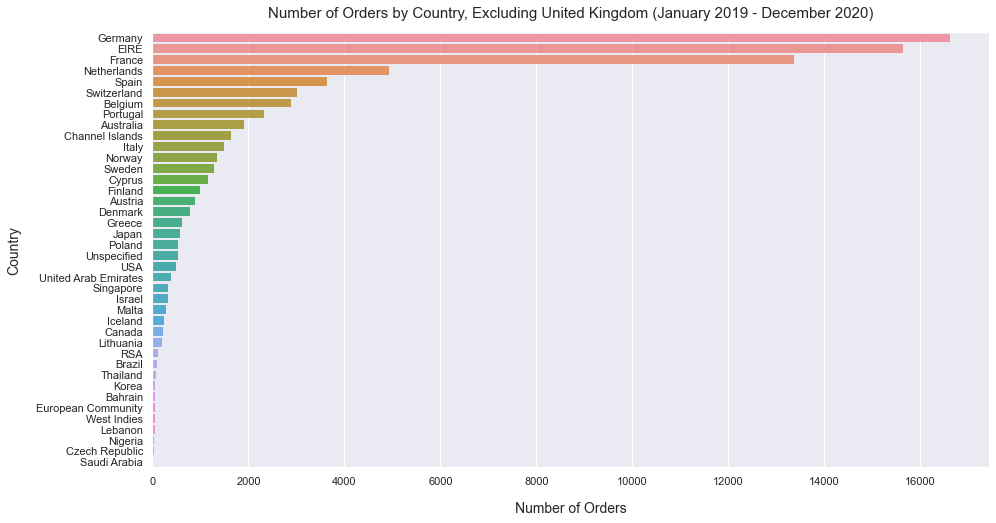

In [19]:
# Plot number of orders by country, excluding the United Kingdom.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df[df['Country'] != 'United Kingdom'].groupby('Country')['InvoiceDate'].
                count().sort_values(ascending=False).reset_index(),
                y='Country', x='InvoiceDate', linewidth=0)
s.set_title('Number of Orders by Country, Excluding United Kingdom (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Number of Orders', fontsize=14, labelpad=15)
s.set_ylabel('Country', fontsize=14, labelpad=15)
plt.show()

**Observations:**

* The ecommerce business is located in the United Kingdom, so it is not surprising that the majority of orders are purchased by customers in the United Kingdom.
* The ecommerce business is overly reliant on the United Kingdom for its business and could face a downturn in business if the United Kingdom market were to have economic or other problems.

**Recommendations:**

* The ecommerce business has significant opportunity to grow its business in other European markets.  Marketing efforts should be increased in these other markets, to increase the customer base and to grow revenue.

## 7. Calculate and Explore Monthly Number of New vs. Existing Customers

In [20]:
# Determine the first purchase date for each customer.
df_first = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
df_first.columns = ['CustomerID','FirstPurchase']
df_first['FirstPurchase'] = df_first['FirstPurchase'].dt.strftime('%Y-%m')

# Add first purchase date feature to the primary dataframe.
df = pd.merge(df, df_first, on='CustomerID')

# Add customer type feature: new vs. existing.
df['Type'] = 'New'
df.loc[df['YearMonth']>df['FirstPurchase'],'Type'] = 'Existing'

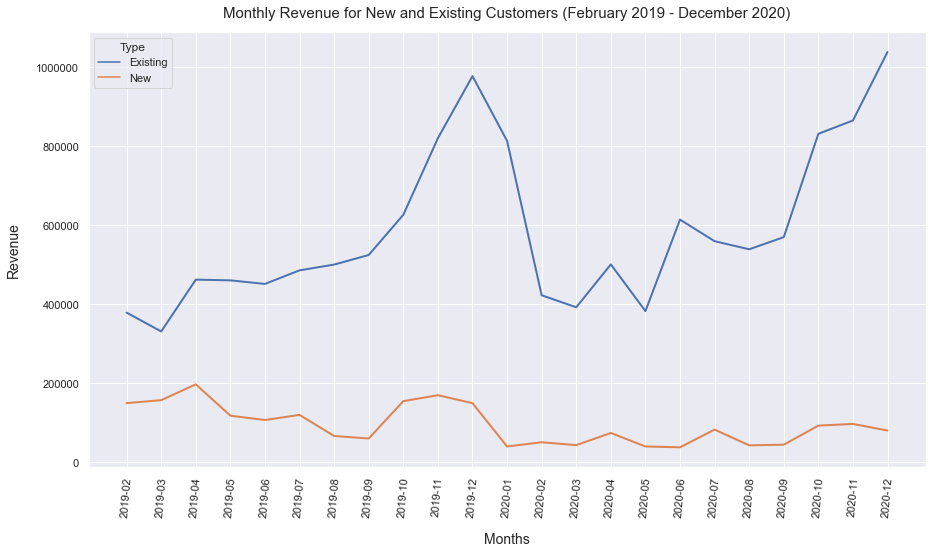

In [21]:
# Calculate revenue per month for new and existing customers.
df_type_revenue = df.groupby(['YearMonth','Type'])['Revenue'].sum().reset_index()
df_type_revenue = df_type_revenue[df_type_revenue['YearMonth'] >= '2019-01-01'].reset_index()

plt.figure(figsize=(15,8))
s = sns.lineplot(data=df_type_revenue, x='YearMonth', y='Revenue', hue='Type', linewidth=2)
s.set_title('Monthly Revenue for New and Existing Customers (February 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Months', fontsize=14, labelpad=15)
s.set_ylabel('Revenue', fontsize=14, labelpad=15)
plt.xticks(np.arange(len(df_type_revenue['YearMonth'])/2), sorted(set(df_type_revenue['YearMonth'])))
plt.ticklabel_format(style='plain', axis='y')

for item in s.get_xticklabels():
    item.set_rotation(85)

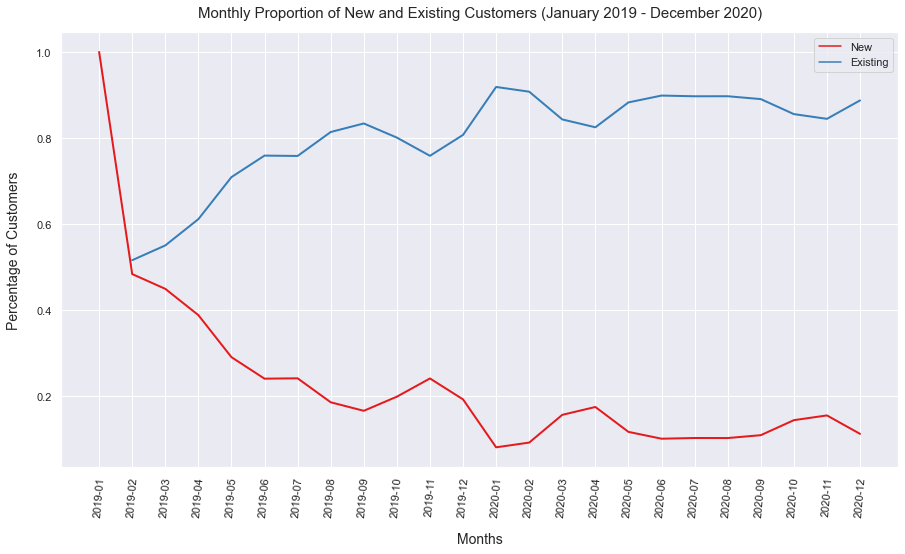

In [22]:
df_ratio_new = df[df['Type'] == 'New'].groupby(['YearMonth'])['CustomerID'].nunique() / df.groupby(['YearMonth'])['CustomerID'].nunique()
df_ratio_existing = df[df['Type'] == 'Existing'].groupby(['YearMonth'])['CustomerID'].nunique()  / df.groupby(['YearMonth'])['CustomerID'].nunique()
df_ratio = pd.merge(df_ratio_new, df_ratio_existing, on='YearMonth').reset_index()
df_ratio.columns = ['YearMonth','New', 'Existing']

plt.figure(figsize=(15,8))
s = sns.lineplot(data=df_ratio, palette='Set1', dashes=False, linewidth=2)
s.set_title('Monthly Proportion of New and Existing Customers (January 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Months', fontsize=14, labelpad=15)
s.set_ylabel('Percentage of Customers', fontsize=14, labelpad=15)
plt.xticks(np.arange(len(df_ratio['YearMonth'])), df_ratio['YearMonth'])
#plt.ticklabel_format(style='plain', axis='y')

for item in s.get_xticklabels():
    item.set_rotation(85)

**Observations:**

* Approximately 10% of customers each month are new to the ecommerce business.  It is good that the business has many return customers however it is not attracting enough new customers to grow the business. 

**Recommendations:**

* The ecommerce business should increase marketing efforts to attract more new customers.

## 8. Calculate and Explore Monthly Retention Rate

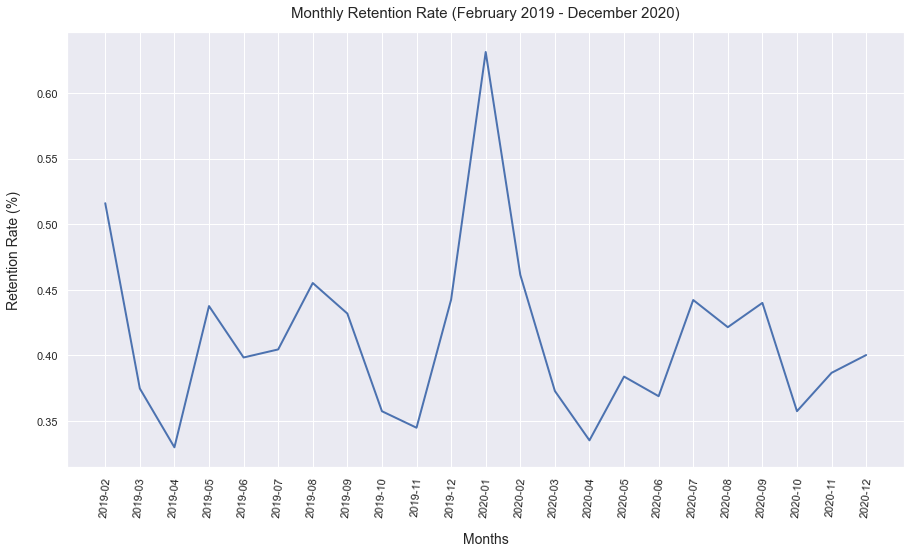

In [23]:
# Determine which customers are active each month.
df_activity = df.groupby(['CustomerID','YearMonth'])['Revenue'].sum().reset_index()

# Use crosstab to create a maxtrix of customer activity by month.
df_retention = pd.crosstab(df_activity['CustomerID'], df_activity['YearMonth']).reset_index()

# Calculate retained and total user counts for each month.
months = df_retention.columns[1:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['YearMonth'] = selected_month
    retention_data['Total'] = df_retention[selected_month].sum()
    retention_data['Retained'] = df_retention[(df_retention[selected_month]>0) & (df_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
# Convert the array to a dataframe and calculate the monthly retention rate.
df_retention = pd.DataFrame(retention_array)
df_retention['Rate'] = df_retention['Retained'] / df_retention['Total']

# Plot the monthly retention rate.
plt.figure(figsize=(15,8))
s = sns.lineplot(data=df_retention, x='YearMonth', y='Rate', linewidth=2)
s.set_title('Monthly Retention Rate (February 2019 - December 2020)', y=1.02, fontsize=15)
s.set_xlabel('Months', fontsize=14, labelpad=15)
s.set_ylabel('Retention Rate (%)', fontsize=14, labelpad=15)
plt.xticks(np.arange(len(df_retention['YearMonth'])), (df_retention['YearMonth']))
plt.ticklabel_format(style='plain', axis='y')

for item in s.get_xticklabels():
    item.set_rotation(85)

# Part C. Customer Segmentation
**Objective:** Segment the customers using Recency, Frequency and Monetary Value (RFM).

## 1. Determine Recency of Customer Purchases

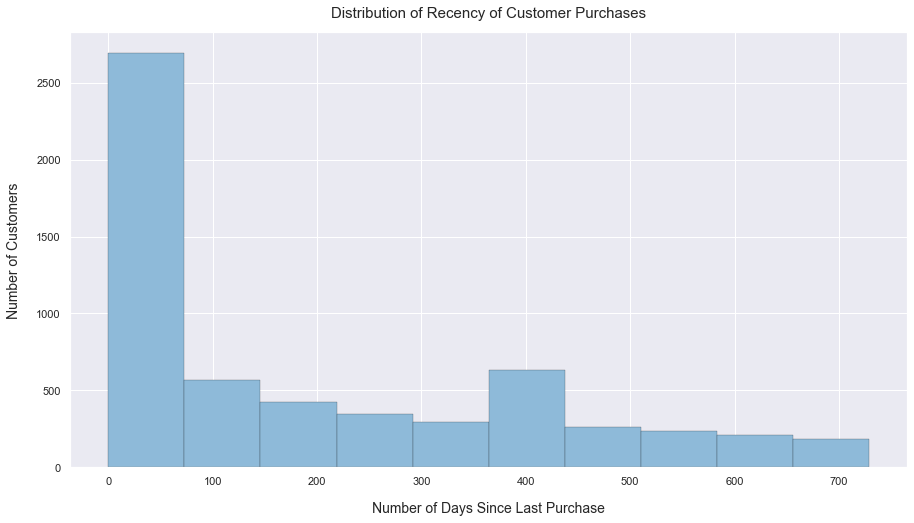

In [24]:
# Create a new dataframe to track RFM scores.
df_customers = pd.DataFrame(df['CustomerID'].unique(), columns = ['CustomerID'])

# Determine the most recent purchase date for each customer and the number of days since.
# Use the most recent purchase date in the dataset as the observation point.
df_recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_recency.columns = ['CustomerID','RecentDate']
df_recency['Recency'] = (df_recency['RecentDate'].max() - df_recency['RecentDate']).dt.days

# Merge the recency data into the customer dataframe.
df_customers = pd.merge(df_customers, df_recency[['CustomerID','Recency']], on='CustomerID')

# Plot recency distribution.
plt.figure(figsize=(15, 8))
plt.hist(df_customers['Recency'], edgecolor='black', linewidth=0.2, color='#8EBAD9')
plt.title('Distribution of Recency of Customer Purchases', y=1.02, fontsize=15)
plt.xlabel('Number of Days Since Last Purchase', fontsize=14, labelpad=15)
plt.ylabel('Number of Customers', fontsize=14, labelpad=15)
plt.show()

## 2. Perform Elbow Analysis and K-Means Clustering on Recency

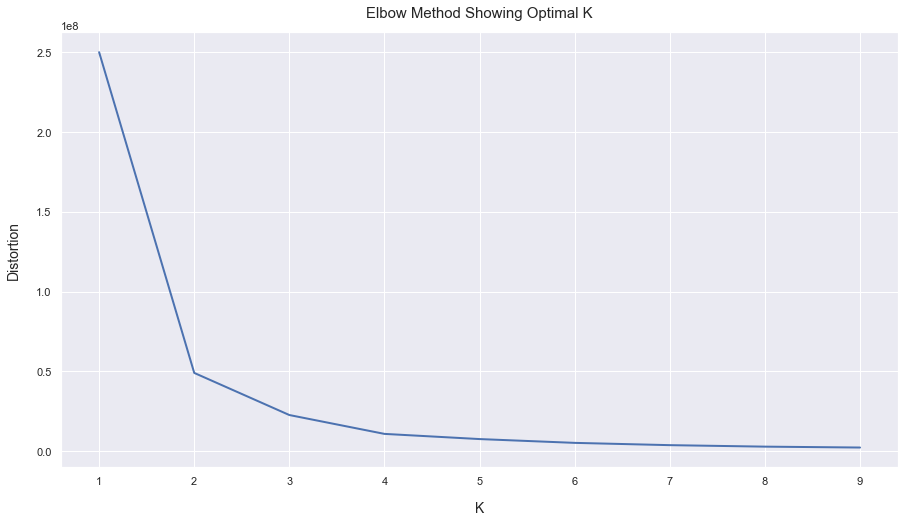

In [25]:
from sklearn.cluster import KMeans
 
distortions = []
df_r = df_customers[['Recency']]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_r)
    distortions.append(kmeanModel.inertia_)  

# Plot elbow to identify optimal k.    
plt.figure(figsize=(15,8))
plt.plot(K, distortions, linewidth=2)
plt.xlabel('K', fontsize=14, labelpad=15)
plt.ylabel('Distortion', fontsize=14, labelpad=15)
plt.title('Elbow Method Showing Optimal K', y=1.02, fontsize=15)
plt.show()

In [26]:
# Function for ordering the cluster numbers, to aide ease of understanding.
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

# Build 4 clusters for recency and add it to the dataframe.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_r)
df_customers['RecencyCluster'] = kmeanModel.predict(df_r)
df_customers = order_cluster('RecencyCluster', 'Recency', df_customers, False)

df_customers.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,763.0,592.469201,75.799241,468.0,532.0,587.0,653.0,729.0
1,1510.0,342.458278,76.530944,197.0,270.0,366.0,404.0,467.0
2,3575.0,51.047552,51.492454,0.0,12.0,32.0,72.0,196.0


**Observations:**

* Cluster 2 has the customers with the most recent purchases, with an average of 51 days since the last purchase.

## 3. Determine Frequency of Customer Purchases

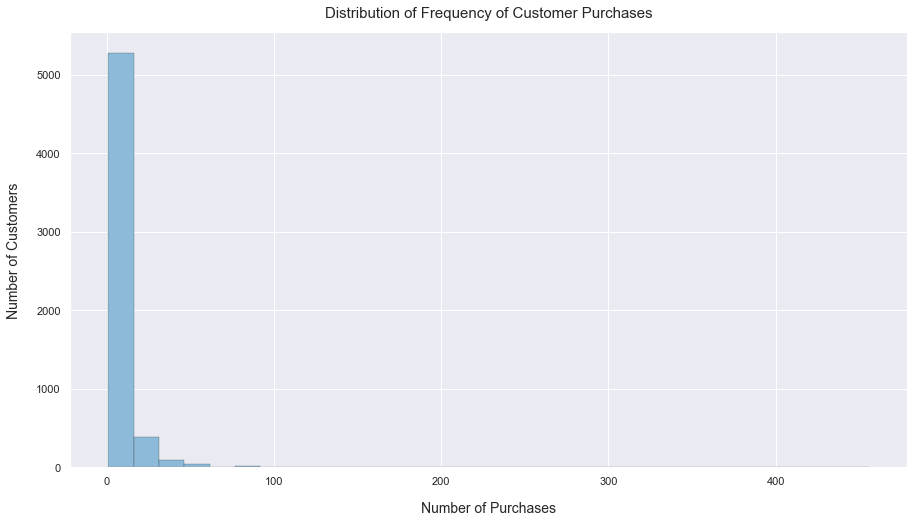

In [27]:
# Determine the frequency of purchases for each customer.
df_frequency = df.groupby('CustomerID')['Invoice'].nunique().reset_index()
df_frequency.columns = ['CustomerID','Frequency']

# Merge the frequency data into the customer dataframe.
df_customers = pd.merge(df_customers, df_frequency, on='CustomerID')

# Plot frequency distribution.
plt.figure(figsize=(15, 8))
plt.hist(df_customers['Frequency'], bins=30, edgecolor='black', linewidth=0.2, color='#8EBAD9')
plt.title('Distribution of Frequency of Customer Purchases', y=1.02, fontsize=15)
plt.xlabel('Number of Purchases', fontsize=14, labelpad=15)
plt.ylabel('Number of Customers', fontsize=14, labelpad=15)
plt.show()

## 4. Perform K-Means Clustering on Frequency

In [28]:
# Build 4 clusters for frequency and add it to the dataframe.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_customers[['Frequency']])
df_customers['FrequencyCluster'] = kmeanModel.predict(df_customers[['Frequency']])
df_customers = order_cluster('FrequencyCluster', 'Frequency', df_customers, True)

df_customers.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,5452.0,4.754219,4.429116,1.0,1.0,3.0,7.0,20.0
1,377.0,35.625995,16.589880,21.0,24.0,30.0,41.0,112.0
2,19.0,190.315789,91.966813,117.0,122.5,150.0,245.5,456.0


**Observations:**

* Cluster 2 has the customers with the highest frequency of purchases, with an average of 190 purchases.

## 5. Determine Monetary Value of Customer

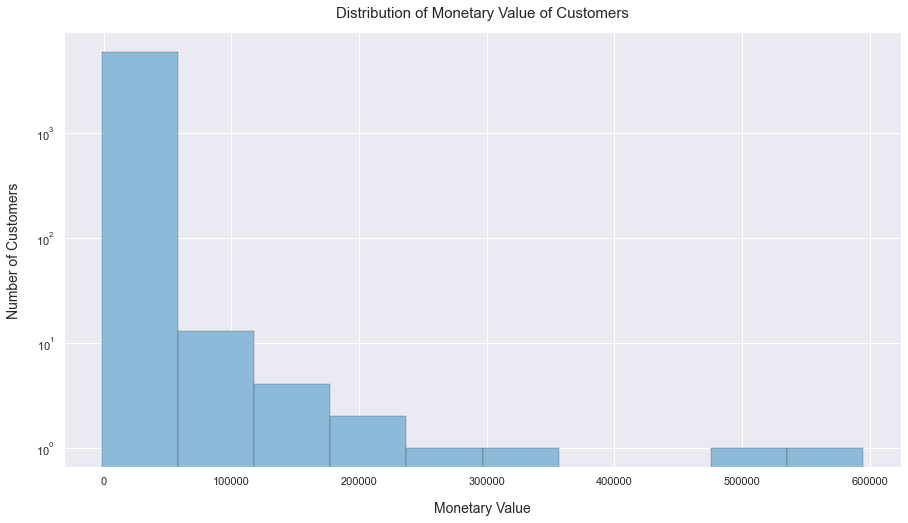

In [29]:
# Determine the monetary value for each customer.
df_mv = df.groupby('CustomerID')['Revenue'].sum().reset_index()

# Merge the monetary value data into the customer dataframe.
df_customers = pd.merge(df_customers, df_mv, on='CustomerID')

# Plot monetary value distribution.
plt.figure(figsize=(15, 8))
plt.hist(df_customers['Revenue'], edgecolor='black', linewidth=0.2, color='#8EBAD9', log=True)
plt.title('Distribution of Monetary Value of Customers', y=1.02, fontsize=15)
plt.xlabel('Monetary Value', fontsize=14, labelpad=15)
plt.ylabel('Number of Customers', fontsize=14, labelpad=15)
plt.show()

## 6. Perform K-Means Clustering on Monetary Value.

In [30]:
# Build 4 clusters for frequency and add it to the dataframe.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_customers[['Revenue']])
df_customers['MonetaryValueCluster'] = kmeanModel.predict(df_customers[['Revenue']])
df_customers = order_cluster('MonetaryValueCluster', 'Revenue', df_customers, True)

df_customers.groupby('MonetaryValueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetaryValueCluster,,,,,,,,
0,5832.0,2251.080744,4860.350944,-1343.24,328.0750,842.440,2162.2825,73415.63
1,14.0,152938.764286,67527.370362,80871.32,101504.7550,134322.040,182178.6350,298276.26
2,2.0,553116.215000,58889.966986,511474.72,532295.4675,553116.215,573936.9625,594757.71


**Observations:**

* Cluster 2 has the customers with the most monetary value, with an average of $553,116 in purchases.

## 7. Calculate Overall Score and Segment Customers

In [31]:
# Calculate overall score and display summary.
df_customers['OverallScore'] = df_customers['RecencyCluster'] + df_customers['FrequencyCluster'] + df_customers['MonetaryValueCluster']
df_customers.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,592.596583,1.917214,533.876465
1,343.026000,3.198000,874.109733
2,55.658864,6.281211,2064.377406
3,21.438547,35.363128,12277.237151
4,7.062500,129.625000,84369.837500
5,4.000000,222.571429,170366.785714
6,4.500000,147.000000,553116.215000


In [32]:
df_customers['Segment'] = 'Low'
df_customers.loc[df_customers['OverallScore'] >= 2,'Segment'] = 'Mid' 
df_customers.loc[df_customers['OverallScore'] >= 3,'Segment'] = 'High' 

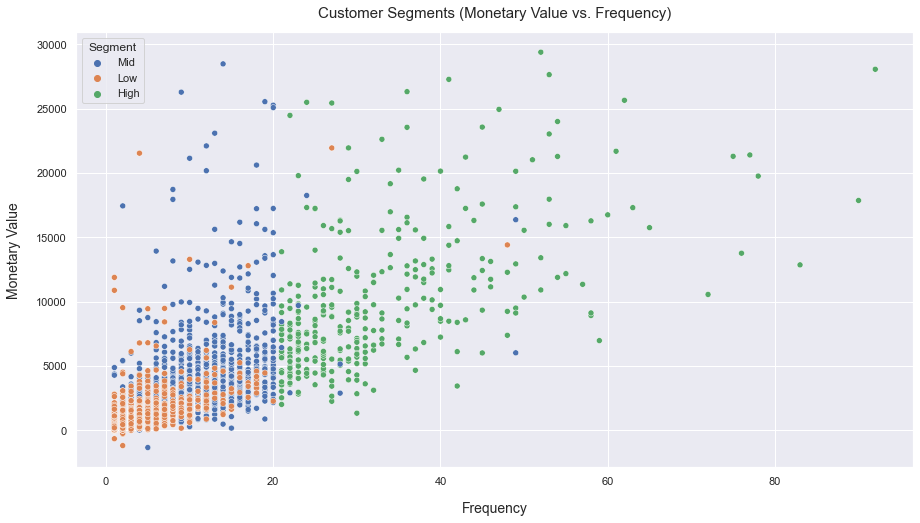

In [33]:
# Plot segements with monetary value vs. frequency.
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_customers[(df_customers['Frequency'] < 100) & (df_customers['Revenue'] < 30000)], 
                                  x="Frequency", y="Revenue", hue="Segment")
plt.title('Customer Segments (Monetary Value vs. Frequency)', y=1.02, fontsize=15)
plt.xlabel('Frequency', fontsize=14, labelpad=15)
plt.ylabel('Monetary Value', fontsize=14, labelpad=15)
plt.show()

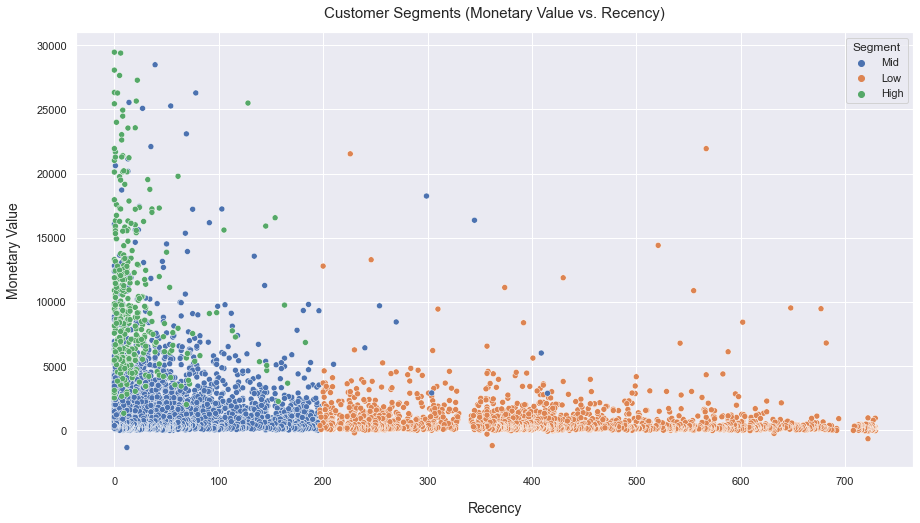

In [34]:
# Plot segements with monetary value vs. frequency.
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_customers[df_customers['Revenue'] < 30000], x="Recency", y="Revenue", hue="Segment")
plt.title('Customer Segments (Monetary Value vs. Recency)', y=1.02, fontsize=15)
plt.xlabel('Recency', fontsize=14, labelpad=15)
plt.ylabel('Monetary Value', fontsize=14, labelpad=15)
plt.show()

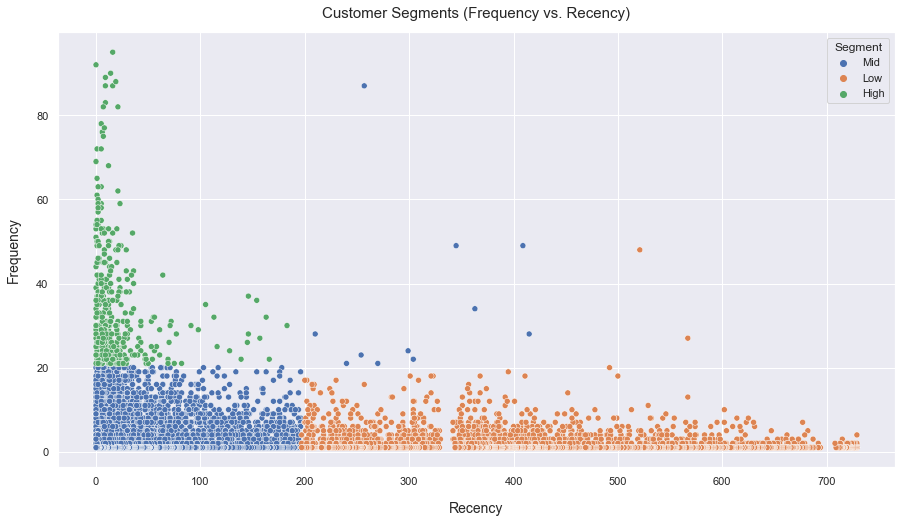

In [35]:
# Plot segements with monetary value vs. frequency.
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_customers[df_customers['Frequency'] < 100], x="Recency", y="Frequency", hue="Segment")
plt.title('Customer Segments (Frequency vs. Recency)', y=1.02, fontsize=15)
plt.xlabel('Recency', fontsize=14, labelpad=15)
plt.ylabel('Frequency', fontsize=14, labelpad=15)
plt.show()

In [36]:
# Display number of customers per segment.
df_customers.groupby('Segment')['CustomerID'].count().reset_index(name='Count Customers')

,Segment,Count Customers
0,High,383
1,Low,2261
2,Mid,3204


In [37]:
# Display sum of revenue for each segment.
df_customers.groupby('Segment')['Revenue'].sum().reset_index(name='Sum Revenue')

,Segment,Sum Revenue
0,High,8043968.23
1,Low,1717444.59
2,Mid,6614265.21


**Observations:**

* Of the 5,848 customers who made a purchase in the past two years, 2,260 of them purchased on average only 2 or 3 times (segment: Low). A further 3,133 customers purchased on average 5 times (segment: Mid).
* Of the $16.4m in sales generated in the past two years, 52% came from the 455 customers in the High segment.  The ecommerce business is far too reliant on such a small group of customers.

**Recommedations:**

* The ecommerce business needs to target specific marketing efforts towards the Low and Mid segments to generate more repeat buying.  It is significantly more cost effective to market towards existing customers than it is to new customers.
* The ecommerce business should conduct a survey to determine why many customers do not repeat buy.
* The ecommerce business should reduce reliance on a small group of customers, by increasing repeat buying of existing customers and attracting new customers to the business.

# Part D. Customer Lifetime Value
**Objective:** Create a model to predict customer lifetime value.

## 1. Perform Clustering Using 6 Months of Sales

In [38]:
# Reperform customer segmentation using most recent 6 months of sales.

df_6months = df[(df['InvoiceDate'] >= '2020-7-1') & (df['InvoiceDate'] <= '2020-12-31')].reset_index(drop=True)

# Create a new dataframe to track RFM scores.
df_customers = pd.DataFrame(df_6months['CustomerID'].unique())
df_customers.columns = ['CustomerID']

# Determine the most recent purchase date for each customer and the number of days since.
# Use the most recent purchase date in the dataset as the observation point.
df_recency = df_6months.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_recency.columns = ['CustomerID','RecentDate']
df_recency['Recency'] = (df_recency['RecentDate'].max() - df_recency['RecentDate']).dt.days
df_customers = pd.merge(df_customers, df_recency[['CustomerID','Recency']], on='CustomerID')

# Build 4 clusters for recency and add it to the dataframe.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_customers[['Recency']])
df_customers['RecencyCluster'] = kmeanModel.predict(df_customers[['Recency']])
df_customers = order_cluster('RecencyCluster', 'Recency', df_customers, False)

# Determine the frequency of purchases for each customer.
df_frequency = df_6months.groupby('CustomerID')['Invoice'].nunique().reset_index()
df_frequency.columns = ['CustomerID','Frequency']
df_customers = pd.merge(df_customers, df_frequency, on='CustomerID')

# Build 4 clusters for frequency and add it to the dataframe.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_customers[['Frequency']])
df_customers['FrequencyCluster'] = kmeanModel.predict(df_customers[['Frequency']])
df_customers = order_cluster('FrequencyCluster', 'Frequency', df_customers, True)

# Determine the monetary value for each customer.
df_mv = df_6months.groupby('CustomerID')['Revenue'].sum().reset_index()
df_customers = pd.merge(df_customers, df_mv, on='CustomerID')

# Build 4 clusters for frequency and add it to the dataframe.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_customers[['Revenue']])
df_customers['MonetaryValueCluster'] = kmeanModel.predict(df_customers[['Revenue']])
df_customers = order_cluster('MonetaryValueCluster', 'Revenue', df_customers, True)

# Calculate overall score and segment.
df_customers['OverallScore'] = df_customers['RecencyCluster'] + df_customers['FrequencyCluster'] + df_customers['MonetaryValueCluster']
df_customers['Segment'] = 'Low'
df_customers.loc[df_customers['OverallScore'] >= 2,'Segment'] = 'Mid' 
df_customers.loc[df_customers['OverallScore'] >= 3,'Segment'] = 'High' 

## 2. Calculate Customer Lifetime Value

In [39]:
# Calculate average order value.
df_customers['AvgOrderValue'] = df_customers['Revenue'] / df_customers['Frequency']

# Calculate purchase frequency.
purchase_frequency = df_customers['Frequency'].sum() / df_customers.shape[0]

# Calculate repeat rate.
repeat_rate = df_customers[df_customers['Frequency'] > 1].shape[0] / df_customers.shape[0]

# Calculate churn rate.
churn_rate = 1 - repeat_rate

# Calculate profit margin.
df_customers['ProfitMargin'] = df_customers['Revenue'] * 0.05

# Calculate Customer Lffetime Value
df_customers['CLV'] = (df_customers['AvgOrderValue'] * purchase_frequency) / churn_rate
df_customers['CustomerLifetimeValue'] = df_customers['CLV'] * df_customers['ProfitMargin']

## 3. Build Model to Predict Customer Lifetime Value

In [40]:
# Select features for training the model.
df_sales = df.pivot_table(index=['CustomerID'],columns=['YearMonth'], values='Revenue', aggfunc='sum', fill_value=0).reset_index()
df_sales['CLV'] = df_sales.iloc[:,2:].sum(axis=1)

X = df_sales[['2020-06','2020-07', '2020-08','2020-09','2020-10','2020-11']]
y = df_sales[['CLV']]

In [41]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model.
regressor = LinearRegression()

# Fit the model to the training data.
regressor.fit(X_train, y_train)

# Make predictions on the test set.
y_pred = regressor.predict(X_test)

In [43]:
from sklearn import metrics

# Compute the R square score for the model.
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

R2 Score:  0.8677422914330012


**Observations:**

* Without tuning, the model has an R squared score of nearly 87% and therefore is quite effective at predicting customer lifetime value.

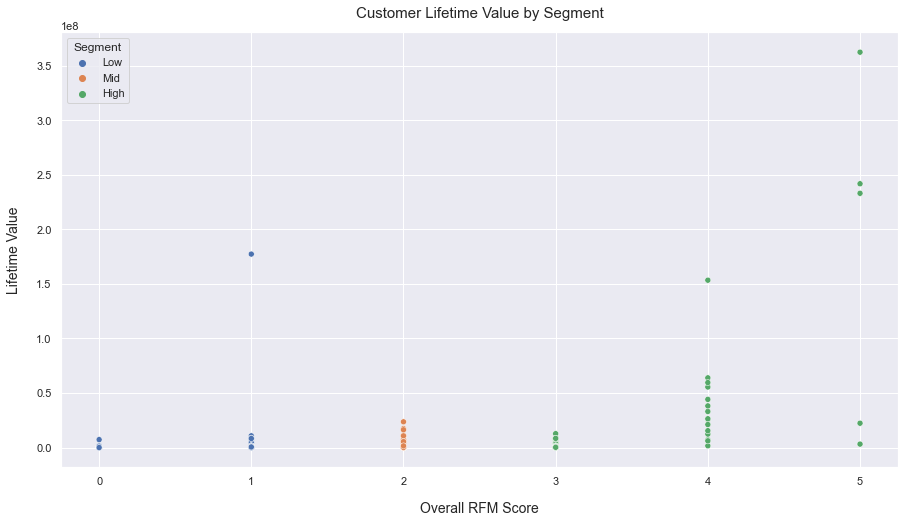

In [44]:
# Plot segements with monetary value vs. frequency.
plt.figure(figsize=(15, 8))
s = sns.scatterplot(data=df_customers[df_customers['CustomerLifetimeValue'] <= 1e+11], x="OverallScore", y="CustomerLifetimeValue", hue="Segment")
plt.title('Customer Lifetime Value by Segment', y=1.02, fontsize=15)
plt.xlabel('Overall RFM Score', fontsize=14, labelpad=15)
plt.ylabel('Lifetime Value', fontsize=14, labelpad=15)
plt.show()

# Part E. Predicting Next Purchase
**Objective:** Build a model to predict a customer's first new purchase date in the next three months.

## 1. Calculate Number of Days Between Last Purchase and Next Purchase

I will use 6 months of data to predict the customer's first purchase date in the next three months.  If there is no purchase, I will also predict that.

In [45]:
# Create two dataframes, one to represent 6 months of transactions, and a second to represent the following 3 months.
df_6months = df[(df['InvoiceDate'] >= '2020-01-01') & (df['InvoiceDate'] <= '2020-06-30')].reset_index(drop=True)
df_next = df[(df['InvoiceDate'] >= '2020-07-01') & (df['InvoiceDate'] <= '2020-09-30')].reset_index(drop=True)

# Create a new dataframe to track customer level data.
df_customers = pd.DataFrame(df_6months['CustomerID'].unique(), columns = ['CustomerID'])

# Create a dataframe with customer's next purchase date.
df_next_purchase = df_next.groupby('CustomerID')['InvoiceDate'].min().reset_index()
df_next_purchase.columns = ['CustomerID','NextPurchase']

# Create a dataframe with customer's last purchase date.
df_last_purchase = df_6months.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_last_purchase.columns = ['CustomerID','LastPurchase']

# Calculate the difference between last and next purchase dates and merge into customer dataframe.
df_purchase_dates = pd.merge(df_last_purchase, df_next_purchase, on='CustomerID', how='left')
df_purchase_dates['NumDays'] = (df_purchase_dates['NextPurchase'] - df_purchase_dates['LastPurchase']).dt.days
df_customers = pd.merge(df_customers, df_purchase_dates[['CustomerID','NumDays']], on='CustomerID', how='left')

# Fill NaN with 999, to represent no purchase made in the next 3 months.
df_customers.fillna(999, inplace=True)
df_customers.head(10)

,CustomerID,NumDays
0,13085,68.0
1,13078,17.0
2,18102,20.0
3,12682,22.0
4,18087,149.0
5,14110,47.0
6,17519,32.0
7,13758,999.0
8,16321,999.0
9,17865,19.0


## 2. Feature Engineering (RFM)

In [46]:
# Determine the most recent purchase date for each customer and the number of days since.
df_recency = df_6months.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_recency.columns = ['CustomerID','RecentDate']
df_recency['Recency'] = (df_recency['RecentDate'].max() - df_recency['RecentDate']).dt.days
df_customers = pd.merge(df_customers, df_recency[['CustomerID','Recency']], on='CustomerID')

# Build 4 clusters for recency and add it to the dataframe.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_customers[['Recency']])
df_customers['RecencyCluster'] = kmeanModel.predict(df_customers[['Recency']])
df_customers = order_cluster('RecencyCluster', 'Recency', df_customers, False)

# Determine the frequency of purchases for each customer.
df_frequency = df_6months.groupby('CustomerID')['Invoice'].nunique().reset_index()
df_frequency.columns = ['CustomerID','Frequency']
df_customers = pd.merge(df_customers, df_frequency, on='CustomerID')

# Build 4 clusters for frequency and add it to the dataframe.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_customers[['Frequency']])
df_customers['FrequencyCluster'] = kmeanModel.predict(df_customers[['Frequency']])
df_customers = order_cluster('FrequencyCluster', 'Frequency', df_customers, True)

# Determine the monetary value for each customer.
df_mv = df_6months.groupby('CustomerID')['Revenue'].sum().reset_index()
df_customers = pd.merge(df_customers, df_mv, on='CustomerID')

# Build 4 clusters for frequency and add it to the dataframe.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_customers[['Revenue']])
df_customers['MonetaryValueCluster'] = kmeanModel.predict(df_customers[['Revenue']])
df_customers = order_cluster('MonetaryValueCluster', 'Revenue', df_customers, True)

# Calculate overall score and segment.
df_customers['OverallScore'] = df_customers['RecencyCluster'] + df_customers['FrequencyCluster'] + df_customers['MonetaryValueCluster']
df_customers['Segment'] = 'Low'
df_customers.loc[df_customers['OverallScore'] >= 2,'Segment'] = 'Mid' 
df_customers.loc[df_customers['OverallScore'] >= 3,'Segment'] = 'High' 

## 3. Feature Engineering (Days Between Last Three Purchases)

In [47]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Create a dataframe with CustomerID and Invoice Date
df_orders = df_6months[['CustomerID','InvoiceDate']]

# Reduce Invoice Date to just date without time.
df_orders['InvoiceDate'] = df_orders['InvoiceDate'].dt.date
df_orders = df_orders.sort_values(['CustomerID','InvoiceDate'])

# Drop duplicates from the dataframe.
df_orders = df_orders.drop_duplicates(subset=['CustomerID','InvoiceDate'],keep='first')

# Use shift to add the last 3 purchase dates.
df_orders['InvoiceDate1'] = df_orders.groupby('CustomerID')['InvoiceDate'].shift(1)
df_orders['InvoiceDate2'] = df_orders.groupby('CustomerID')['InvoiceDate'].shift(2)
df_orders['InvoiceDate3'] = df_orders.groupby('CustomerID')['InvoiceDate'].shift(3)

In [48]:
# Calculate the difference in days for each invoice date.
df_orders['Diff1'] = (df_orders['InvoiceDate'] - df_orders['InvoiceDate1']).dt.days
df_orders['Diff2'] = (df_orders['InvoiceDate'] - df_orders['InvoiceDate2']).dt.days
df_orders['Diff3'] = (df_orders['InvoiceDate'] - df_orders['InvoiceDate3']).dt.days

# Caculate mean and standard deviation of the difference between purchase dates.
df_diff = df_orders.groupby('CustomerID').agg({'Diff1': ['mean','std']}).reset_index()
df_diff.columns = ['CustomerID', 'DiffMean','DiffStd']

In [49]:
# Keep only customers who have greater than 3 purchases, as it would be too difficult 
# to predict for customers with less purchases.

df_orders_last = df_orders.drop_duplicates(subset=['CustomerID'], keep='last')

In [50]:
# Drop rows with NA.
df_orders_last = df_orders_last.dropna()

# Merge back into the customer dataframe.
df_orders_last = pd.merge(df_orders_last, df_diff, on='CustomerID')
df_customers = pd.merge(df_customers, df_orders_last[['CustomerID','Diff1','Diff2','Diff3','DiffMean','DiffStd']], on='CustomerID')
df_customers.drop(['Segment'], axis=1, inplace=True)

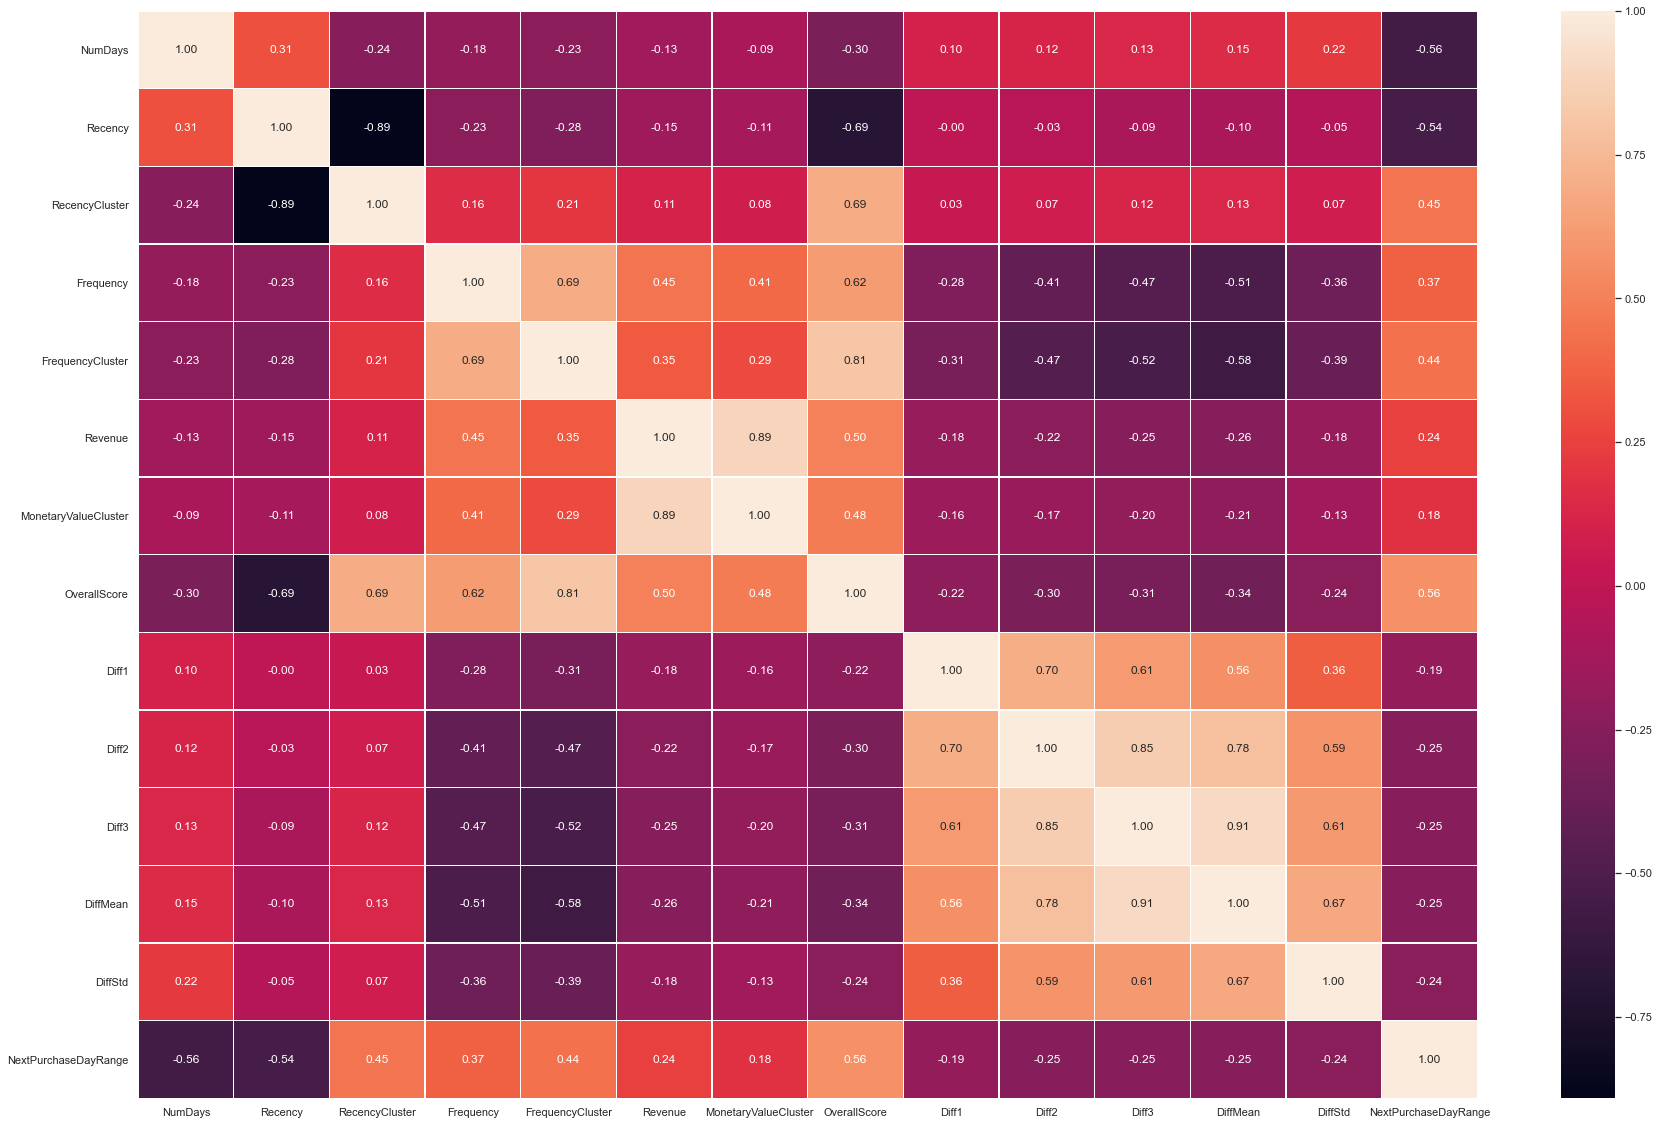

In [51]:
#Define classes for our label, customers who will purchase in 30, 60 and 60+ days.
df_customers['NextPurchaseDayRange'] = 2
df_customers.loc[df_customers['NumDays'] > 30, 'NextPurchaseDayRange'] = 1
df_customers.loc[df_customers['NumDays'] > 60, 'NextPurchaseDayRange'] = 0

# Disaply correlation matri.
corr = df_customers[df_customers.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")
plt.show()

## 4. Build Prediction Model

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

# Split dataset into training and test sets.
X = df_customers.drop('NextPurchaseDayRange',axis=1)
y = df_customers['NextPurchaseDayRange']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model.
regressor = GaussianNB()

# Perform cross validation to evaluate model
kfold = KFold(n_splits=2, random_state=22)
cv_result = cross_val_score(regressor,X_train,y_train, cv = kfold,scoring = "accuracy")
print('CV Result: ', cv_result)

CV Result:  [0.77916667 0.90416667]
